In [208]:
import pandas as pd

weather_df = pd.read_csv('Daegu_utf8.csv', encoding='utf-8')
print(weather_df.columns)
print(weather_df['날짜'].dtype)

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')
object


In [209]:
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
print(weather_df['날짜'].dtype)

datetime64[ns]


In [210]:
start_year = input('시작 연도를 입력하세요: ')
last_year = input('마지막 연도를 입력하세요: ')
choice_month = input('기온 변화를 측정할 달을 입력하세요: ')

시작 연도를 입력하세요: 2001
마지막 연도를 입력하세요: 2021
기온 변화를 측정할 달을 입력하세요: 8


In [214]:
start_year_df = weather_df[weather_df['날짜'].dt.year >= int(start_year)]
last_year_df = start_year_df[start_year_df['날짜'].dt.year <= int(last_year)]
last_year_df

choice_month_df = last_year_df[last_year_df['날짜'].dt.month == int(choice_month)]

choice_month_df['날짜'] = choice_month_df['날짜'].astype(str)

choice_month_df = pd.concat([choice_month_df, choice_month_df['날짜'].str.split('-', expand=True)], axis=1)

C:\Users\ahasu\AppData\Local\Temp\ipykernel_12392\954075236.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choice_month_df['날짜'] = choice_month_df['날짜'].astype(str)


2001년부터 2021년까지 8월의 기온 변화
8월 최저기온 평균: 
23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4
8월 최저기온 평균: 
31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5


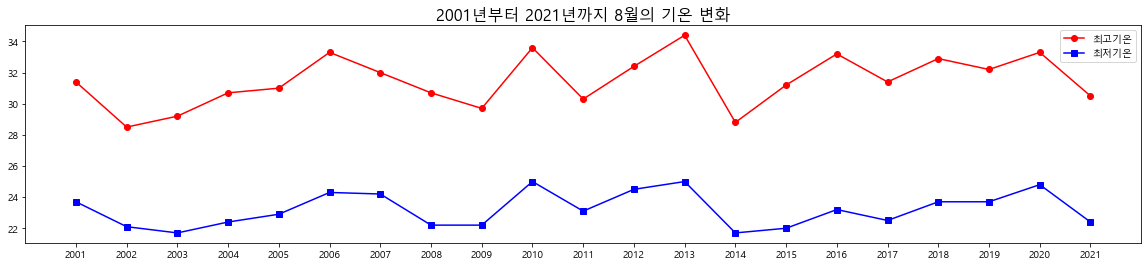

In [215]:
choice_month_df = choice_month_df.groupby(0).mean()     # 그룹바이 할때 ''안 쓰는 것 인지!, 집계함수 쓸 때도 주의 !!
choice_month_df

max_temp_mean = list(round(choice_month_df['최고기온'],1))
min_temp_mean = list(round(choice_month_df['최저기온'],1))


x_year = []
for i in range(int(start_year), int(last_year)+1):
    x_year.append(i)
    
str1 = str(max_temp_mean[0])
for data in max_temp_mean[1:]:
    str1 = str1 + ', ' + str(data)
    
str2 = str(min_temp_mean[0])
for data in min_temp_mean[1:]:
    str2 = str2 + ', ' + str(data)
    
print(f'{start_year}년부터 {last_year}년까지 {choice_month}월의 기온 변화')
print(f'{choice_month}월 최저기온 평균: \n{str2}')
print(f'{choice_month}월 최저기온 평균: \n{str1}')

import csv
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
   
if platform.system() == 'Windows':
    font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
    plt.rc('font', family=font_name)

plt.figure(figsize=(20, 4))
plt.plot(x_year, max_temp_mean, 'red', marker='o', label='최고기온')
plt.plot(x_year, min_temp_mean, 'blue', marker='s', label='최저기온')
plt.rcParams['axes.unicode_minus'] = False
plt.title("{}년부터 {}년까지 {}월의 기온 변화".format(start_year, last_year, choice_month), size=16)
plt.xticks(x_year)
plt.legend()
plt.show()